In [1]:
import os  
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
%matplotlib inline

In [115]:
path = "Data/ex1data1.txt"
data = pd.read_csv(path, header=None, names=['Population', 'Profit'])

# Insert intercept, and extract X, y, and create theta
data.insert(0, "Ones", 1)
X = np.array(data.iloc[:,:-1])  
y = np.array(data.iloc[:,-1])
theta = np.zeros(X.shape[1])

In [43]:
#data.head()
#data.describe()
#data.plot(kind='scatter', x='Population', y='Profit', figsize=(12,8))

In [63]:
def computeCost(X, y, theta):
    # Using least squares error, compute 
    return np.sum(np.power((np.dot(X,theta) - y), 2)) / (2 * len(X))

In [116]:
def gradientDescent(X, y, theta, alpha, iters):  
    cost = np.zeros(iters)

    for i in range(iters):
        error = np.dot(X, theta) - y
        theta = theta - (alpha / len(X))*np.dot(X.T,error)
        cost[i] = computeCost(X, y, theta)

    return theta, cost

In [118]:
alpha = 0.01  
iters = 1000

g, cost = gradientDescent(X, y, theta, alpha, iters)

array([-3.24140214,  1.1272942 ])

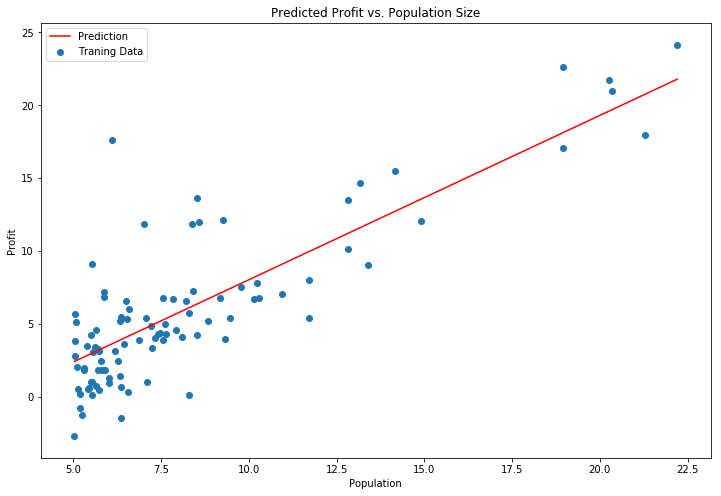

In [120]:
# Plot the curve
x = np.linspace(data.Population.min(), data.Population.max(), 100)  
f = g[0] + (g[1] * x)

fig, ax = plt.subplots(figsize=(12,8))  
ax.plot(x, f, 'r', label='Prediction')  
ax.scatter(data.Population, data.Profit, label='Traning Data')  
ax.legend(loc=2)  
ax.set_xlabel('Population')  
ax.set_ylabel('Profit')  
ax.set_title('Predicted Profit vs. Population Size')

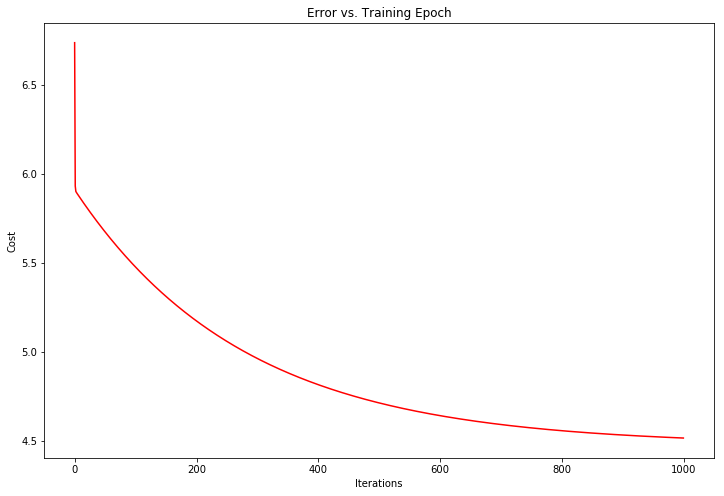

In [121]:
# Plot the cost
fig, ax = plt.subplots(figsize=(12,8))  
ax.plot(np.arange(iters), cost, 'r')  
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')  
ax.set_title('Error vs. Training Epoch')

In [130]:
path = "Data/ex1data2.txt" 
data2 = pd.read_csv(path, header=None, names=['Size', 'Bedrooms', 'Price'])

# Normalize features
data2 = (data2 - data2.mean()) / data2.std()

# Insert intercept, and extract X, y, and create theta
data2.insert(0, "Ones", 1)
X = np.array(data2.iloc[:,:-1])  
y = np.array(data2.iloc[:,-1])
theta = np.zeros(X.shape[1])

In [132]:
alpha = 0.01  
iters = 1000

g, cost = gradientDescent(X, y, theta, alpha, iters)

computeCost(X, y, g)

0.13070336960771892

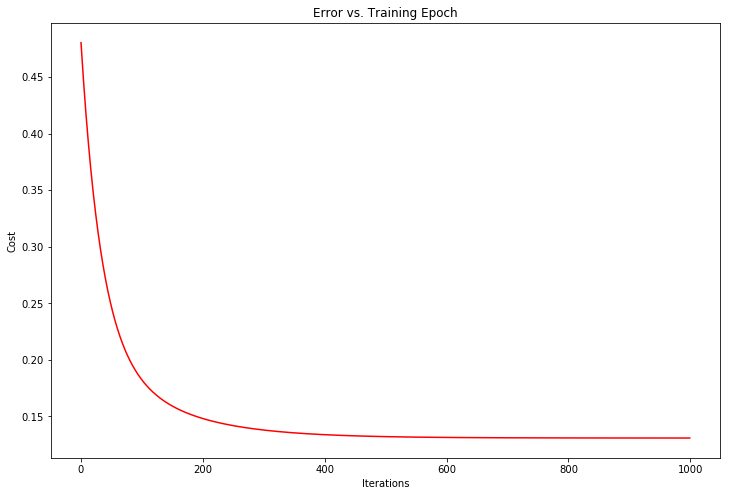

In [135]:
# Plot the cost
fig, ax = plt.subplots(figsize=(12,8))  
ax.plot(np.arange(iters), cost, 'r')  
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')  
ax.set_title('Error vs. Training Epoch')